数据处理

In [2]:
import os
from PIL import Image, ImageEnhance, ImageOps, ImageFilter
import random


由于数据集的样本量太少，用轻度处理然后

In [1]:
def light_augment_image(image):
    """
    Apply light transformations to an image for testing.
    """
    # Light random rotation
    angle = random.uniform(-5, 5)
    image = image.rotate(angle, expand=True)

    # Light random color change
    enhancer = ImageEnhance.Color(image)
    image = enhancer.enhance(random.uniform(0.9, 1.1))

    # Light random contrast change
    contrast_enhancer = ImageEnhance.Contrast(image)
    image = contrast_enhancer.enhance(random.uniform(0.9, 1.1))

    # Light random brightness change
    brightness_enhancer = ImageEnhance.Brightness(image)
    image = brightness_enhancer.enhance(random.uniform(0.9, 1.1))

    return image

def augment_test_dataset(dataset_dir, augmented_dir, target_count=517):
    """
    Augment the images in the test dataset directory
    with light transformations until each has `target_count` images,
    and save them in a new directory.
    """
    os.makedirs(augmented_dir, exist_ok=True)

    for brand_dir in os.listdir(dataset_dir):
        brand_path = os.path.join(dataset_dir, brand_dir)
        if not os.path.isdir(brand_path):
            continue

        images = os.listdir(brand_path)
        num_images = len(images)
        augmentations_needed = target_count - num_images

        new_brand_dir_path = os.path.join(augmented_dir, brand_dir)
        os.makedirs(new_brand_dir_path, exist_ok=True)

        while augmentations_needed > 0:
            for image_name in images:
                if augmentations_needed <= 0:
                    break

                image_path = os.path.join(brand_path, image_name)
                with Image.open(image_path) as img:
                    new_img = light_augment_image(img)

                    new_image_name = f"{brand_dir}-{num_images + 1}.png"
                    new_img.save(os.path.join(new_brand_dir_path, new_image_name))

                    num_images += 1
                    augmentations_needed -= 1
    # Example usage
original_dataset_dir = 'E:\\MV-coursework\\Car_Logo_Dataset'
new_augmented_dir = 'E:\\MV-coursework\\light_augment_image_Dataset'
augment_test_dataset(original_dataset_dir, new_augmented_dir)

NameError: name 'os' is not defined

In [13]:
dataset_path = 'E:\\MV-coursework\\light_augment_image_Dataset'
dataset_name = dataset_path.split('_')[0]
print('dataset', dataset_name)

dataset E:\MV-coursework\light


In [14]:

import random

In [15]:
classes = os.listdir(dataset_path)
len(classes)

32

In [16]:
classes

['1-Volvo',
 '10-BMW',
 '11-Jeep',
 '12-Kia',
 '13-Citroen',
 '14-Land Rover',
 '15-Lexus',
 '16-Mazda',
 '17-Mercedes',
 '18-Mini',
 '19-Mitsubishi',
 '2-Volkswagen',
 '20-Nissan',
 '21-Opel',
 '22-Peugeot',
 '23-Renault',
 '24-Seat',
 '25-GMC',
 '26-Smart',
 '27-Subaru',
 '28-Suzuki',
 '29-Tesla',
 '3-Hyundai',
 '30-Toyota',
 '31-Alfa Romeo',
 '32-Acura',
 '4-Lancia',
 '5-Dacia',
 '6-Daewoo',
 '7-Ford',
 '8-Skoda',
 '9-Honda']

In [17]:
os.makedirs(os.path.join(dataset_path, 'train'), exist_ok=True)
os.makedirs(os.path.join(dataset_path, 'test'), exist_ok=True)
os.makedirs(os.path.join(dataset_path, 'val'), exist_ok=True)
for PlantVillage in classes:
    os.makedirs(os.path.join(dataset_path, 'train', PlantVillage), exist_ok=True)
    os.makedirs(os.path.join(dataset_path, 'test', PlantVillage), exist_ok=True)
    os.makedirs(os.path.join(dataset_path, 'val', PlantVillage), exist_ok=True)

In [18]:
test_frac = 0.15
val_frac = 0.15
random.seed(666)

In [19]:
import os
import random
import shutil
import pandas as pd

# Create a DataFrame
df = pd.DataFrame()

print('{:^18} {:^18} {:^18} {:^18}'.format('categories', 'training set number', 'val set number', 'test set number'))

for PlantVillage in classes:
    old_dir = os.path.join(dataset_path, PlantVillage)
    images_filename = os.listdir(old_dir)
    random.shuffle(images_filename) 

    testset_number = int(len(images_filename) * test_frac) 
    valset_number = int(len(images_filename) * val_frac)   
    testset_images = images_filename[:testset_number]    
    valset_images = images_filename[testset_number:testset_number + valset_number] 
    trainset_images = images_filename[testset_number + valset_number:] 

    for image in testset_images:
        old_img_path = os.path.join(dataset_path, PlantVillage, image)     
        new_test_path = os.path.join(dataset_path, 'test', PlantVillage, image) 
        shutil.move(old_img_path, new_test_path) 

    for image in valset_images:
        old_img_path = os.path.join(dataset_path, PlantVillage, image)           
        new_val_path = os.path.join(dataset_path, 'val', PlantVillage, image) 
        shutil.move(old_img_path, new_val_path) 

    for image in trainset_images:
        old_img_path = os.path.join(dataset_path, PlantVillage, image)        
        new_train_path = os.path.join(dataset_path, 'train', PlantVillage, image) 
        shutil.move(old_img_path, new_train_path)

    assert len(os.listdir(old_dir)) == 0 
    shutil.rmtree(old_dir) 

    print('{:^18} {:^18} {:^18} {:^18}'.format(PlantVillage, len(trainset_images),len(valset_images), len(testset_images)))

    new_row = {'class': PlantVillage, 'trainset': len(trainset_images), 'valset': len(valset_images), 'testset': len(testset_images)}
    df = pd.concat([df, pd.DataFrame(new_row, index=[0])], ignore_index=True)

shutil.move(dataset_path, dataset_name+'_split')

df['total'] = df['trainset'] + df['valset'] + df['testset']
df.to_csv('Data volume statistics.csv', index=False)

    categories     training set number   val set number    test set number  
     1-Volvo              350                 75                 75        
      10-BMW              350                 75                 75        
     11-Jeep              350                 75                 75        
      12-Kia              350                 75                 75        
    13-Citroen            350                 75                 75        
  14-Land Rover           350                 75                 75        
     15-Lexus             350                 75                 75        
     16-Mazda             350                 75                 75        
   17-Mercedes            350                 75                 75        
     18-Mini              350                 75                 75        
  19-Mitsubishi           350                 75                 75        
   2-Volkswagen           350                 75                 75        
    20-Niss

In [20]:
dataset_dir = 'Data_split'

In [2]:
import os
from PIL import Image, ImageEnhance, ImageOps, ImageFilter
import random
import numpy as np
import cv2

def find_perspective_transform_matrix(original_points, new_points):
    # 将点转换为所需格式
    original_points = np.float32(original_points)
    new_points = np.float32(new_points)

    # 计算透视变换矩阵
    matrix = cv2.getPerspectiveTransform(original_points, new_points)
    return matrix

def random_perspective_transform(image):
    width, height = image.size

    # 定义原始点和新点
    original_points = np.float32([[0, 0], [width, 0], [width, height], [0, height]])
    left = random.uniform(0.1, 0.3) * width
    top = random.uniform(0.1, 0.3) * height
    right = width - left
    bottom = height - top
    new_points = np.float32([[left, top], [right, top], [right, bottom], [left, bottom]])

    # 计算透视变换矩阵
    matrix = cv2.getPerspectiveTransform(original_points, new_points)

    # 应用透视变换
    transformed_image = cv2.warpPerspective(np.array(image), matrix, (width, height))

    # 将OpenCV图像转换回PIL格式
    return Image.fromarray(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))

def random_blur(image):
    if random.random() > 0.5:
        return image.filter(ImageFilter.GaussianBlur(radius=random.uniform(0.1, 2.0)))
    return image


def random_rotation(image):
    """
    Apply a random rotation to the image without cropping it.
    """
    # Randomly choose a rotation angle.
    angle = random.randint(-30, 30)

    # Rotate the image without cropping.
    return image.rotate(angle, expand=True)

def add_random_noise(image):
    """
    Add random noise to an image.
    """
    # Convert image to array
    image_array = np.array(image)

    # Generate noise
    noise = np.random.randint(-25, 25, image_array.shape, dtype='int16')

    # Add noise and ensure values remain in the proper range
    image_array = np.clip(image_array + noise, 0, 255).astype('uint8')

    # Convert array back to image
    noisy_image = Image.fromarray(image_array)
    return noisy_image


def augment_image(image):
    """
    Apply random transformations to an image to create a new, augmented image.
    """
    # Random rotation
    image = random_rotation(image)


    # Random flip
    if random.random() > 0.5:
        image = ImageOps.mirror(image)

    # Random color change
    enhancer = ImageEnhance.Color(image)
    image = enhancer.enhance(random.uniform(0.5, 1.5))


    # Random contrast change
    contrast_enhancer = ImageEnhance.Contrast(image)
    image = contrast_enhancer.enhance(random.uniform(0.5, 1.5))

    # Random brightness change
    brightness_enhancer = ImageEnhance.Brightness(image)
    image = brightness_enhancer.enhance(random.uniform(0.5, 1.5))

    # Random perspective transformation
    if random.random() > 0.5:
        image = random_perspective_transform(image)

    # Random blur
    image = random_blur(image)

    if random.random() > 0.5:
        image = add_random_noise(image)

    return image



def augment_dataset(dataset_dir, augmented_dir, target_count=367):
    """
    Augment the images in each subdirectory of the dataset directory
    until each has `target_count` images, and save them in a new directory.
    """
    # Create a new top-level directory for augmented images
    os.makedirs(augmented_dir, exist_ok=True)

    for brand_dir in os.listdir(dataset_dir):
        brand_path = os.path.join(dataset_dir, brand_dir)
        if not os.path.isdir(brand_path):
            continue

        images = os.listdir(brand_path)
        num_images = len(images)
        augmentations_needed = target_count - num_images

        # Create a new directory for each brand in the augmented directory
        new_brand_dir_path = os.path.join(augmented_dir, brand_dir)
        os.makedirs(new_brand_dir_path, exist_ok=True)

        # Augment images until the target count is reached
        while augmentations_needed > 0:
            for image_name in images:
                if augmentations_needed <= 0:
                    break

                image_path = os.path.join(brand_path, image_name)
                with Image.open(image_path) as img:
                    new_img = augment_image(img)

                    # Create a new image name and save the augmented image
                    new_image_name = f"{brand_dir}-{num_images + 1}.png"
                    new_img.save(os.path.join(new_brand_dir_path, new_image_name))

                    num_images += 1
                    augmentations_needed -= 1


# Example usage
original_dataset_dir = 'E:\\MV-coursework\\Car_Logo_Dataset'  # Replace with your original dataset directory
new_augmented_dir = 'E:\\MV-coursework\\light_split\\train+'  # Path for the new directory to store augmented images
augment_dataset(original_dataset_dir, new_augmented_dir)


KeyboardInterrupt: 

In [5]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_dir = "E:\\MV-coursework\\light_split\\train_plus"
val_dir = "E:\\MV-coursework\\Augmented_split\\val"  # Replace with the correct path for validation data
test_dir = "E:\\MV-coursework\\Augmented_split\\test"

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [8]:
batch_size1 = 16
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=batch_size1,
    class_mode='categorical',
    subset='training'  # Use 'training' subset for training data
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=batch_size1,
    shuffle = False,
    class_mode='categorical'
    
    # subset='validation'  # Use 'validation' subset for validation data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=batch_size1,
    shuffle = False,
    class_mode='categorical'
)

Found 11200 images belonging to 32 classes.
Found 2400 images belonging to 32 classes.
Found 2400 images belonging to 32 classes.


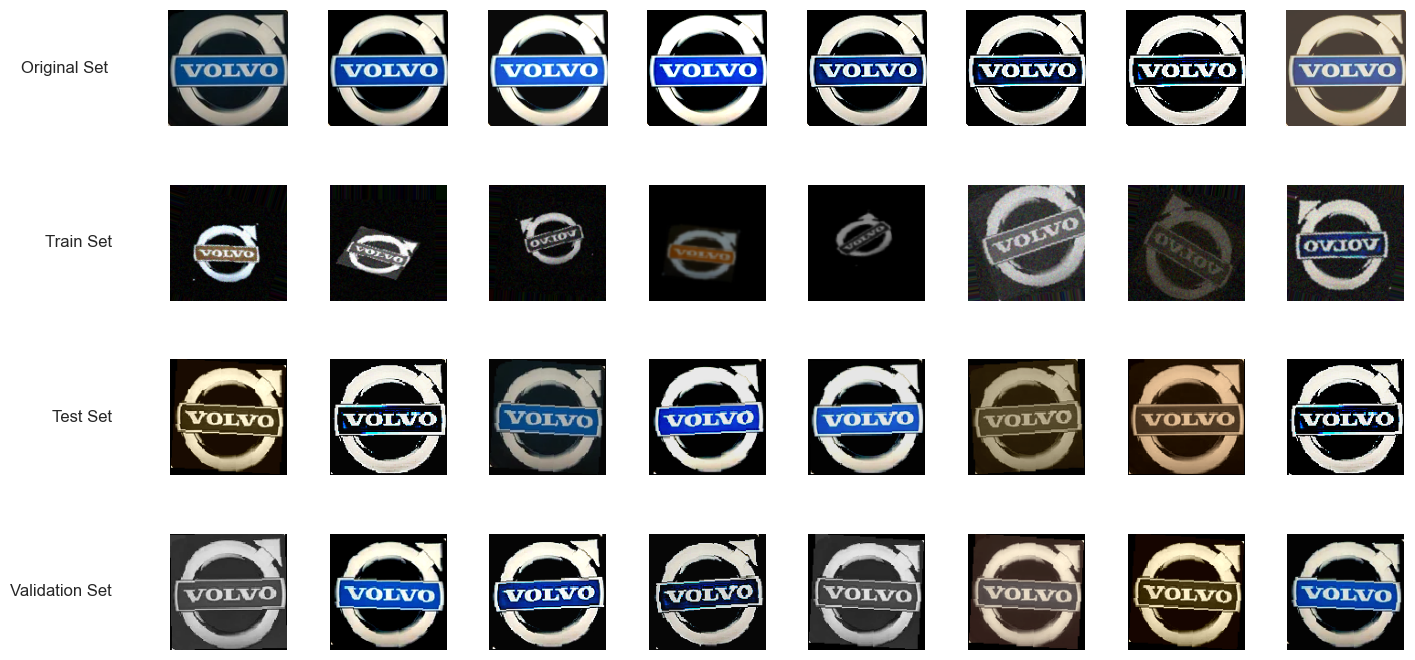

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def load_images_from_folder(folder, num_images=8):
    images = []
    for filename in os.listdir(folder)[:num_images]:
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

def get_volvo_images(generator, volvo_index, num_images=8):
    volvo_images = []
    while len(volvo_images) < num_images:
        images, labels = next(generator)
        volvo_images.extend([img for img, lbl in zip(images, labels) if lbl.argmax() == volvo_index])
    return volvo_images[:num_images]

# 设置沃尔沃图片文件夹的路径
volvo_dir = 'E:\\MV-coursework\\Car_Logo_Dataset\\1-Volvo'

# 从文件夹中加载沃尔沃的图像
folder_volvo_images = load_images_from_folder(volvo_dir, 8)

# 获取类别标签的名称
class_names = list(train_generator.class_indices.keys())


volvo_index = class_names.index('1-Volvo')

train_volvo_images = get_volvo_images(train_generator, volvo_index, 8)
test_volvo_images = get_volvo_images(test_generator, volvo_index, 8)
val_volvo_images = get_volvo_images(validation_generator, volvo_index, 8)


rows = 4  
columns = 8  
fig, axes = plt.subplots(rows, columns, figsize=(columns * 2, rows * 2))  


def fill_row(row, images, dataset_name):
   
    axes[row, 0].text(-0.5, 0.5, dataset_name, verticalalignment='center', horizontalalignment='right', transform=axes[row, 0].transAxes, fontsize=12)
    for i, img in enumerate(images):
        axes[row, i].imshow(img)
        axes[row, i].axis("off")

fill_row(0, folder_volvo_images, 'Original Set')
fill_row(1, train_volvo_images, 'Train Set')
fill_row(2, test_volvo_images, 'Test Set')
fill_row(3, val_volvo_images, 'Validation Set')


plt.subplots_adjust(left=0.125, right=0.9, top=0.9, bottom=0.1, hspace=0.5, wspace=0.3)
plt.show()


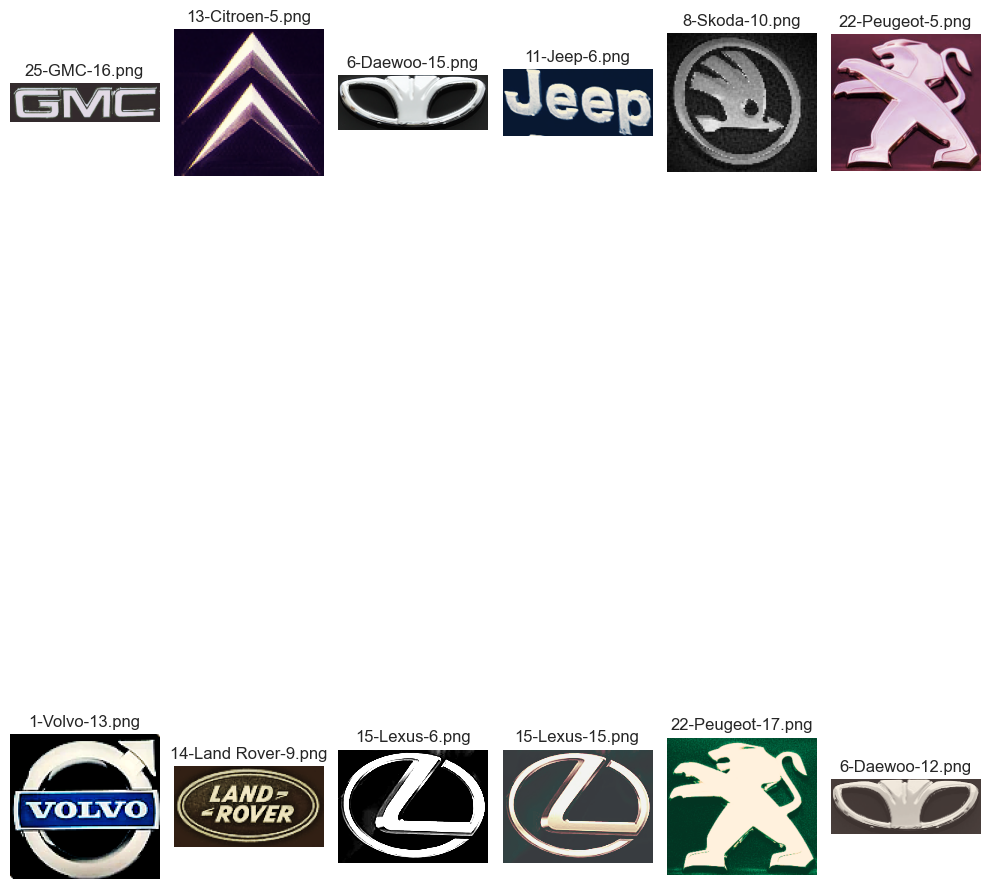

In [10]:

import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def display_random_images(path, num_images=12):
   
    sub_dirs = [os.path.join(path, d) for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

    
    chosen_images = []
    while len(chosen_images) < num_images:
        sub_dir = random.choice(sub_dirs)
        images = [os.path.join(sub_dir, img) for img in os.listdir(sub_dir) if img.lower().endswith(('png', 'jpg', 'jpeg'))]
        if images:
            chosen_images.append(random.choice(images))

  
    fig, axes = plt.subplots(2,6 , figsize=(10, 20))
    axes = axes.ravel()

  
    for i, img_path in enumerate(chosen_images):
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(os.path.basename(img_path))
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


dataset_path = 'E:\\MV-coursework\\Car_Logo_Dataset'
display_random_images(dataset_path)

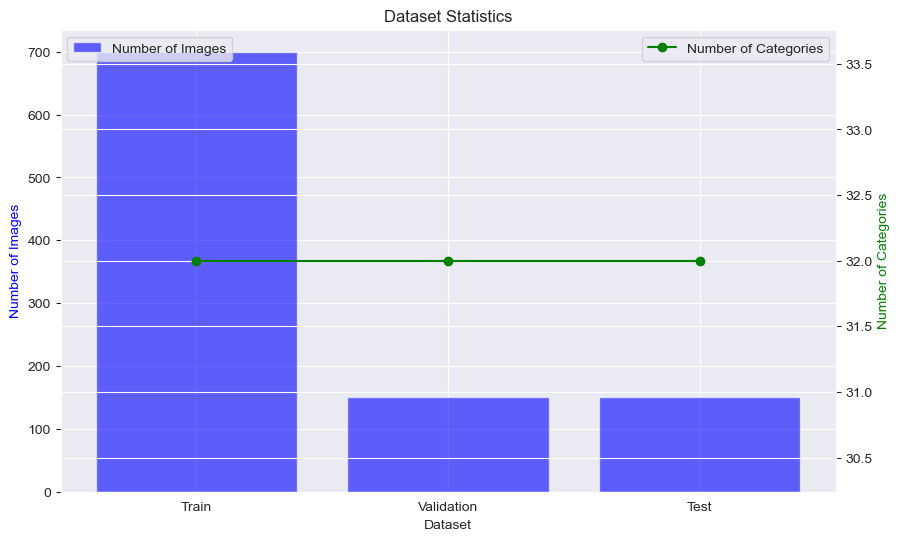

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    'Dataset': ['Train', 'Validation', 'Test'],
    'Number of Images': [len(train_generator), len(validation_generator), len(test_generator)],
    'Number of Categories': [len(train_generator.class_indices), len(validation_generator.class_indices), len(test_generator.class_indices)]
}


df = pd.DataFrame(data)


fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.bar(df['Dataset'], df['Number of Images'], color='b', alpha=0.6, label='Number of Images')


ax2 = ax1.twinx()
ax2.plot(df['Dataset'], df['Number of Categories'], color='g', marker='o', label='Number of Categories')


ax1.set_xlabel('Dataset')
ax1.set_ylabel('Number of Images', color='b')
ax2.set_ylabel('Number of Categories', color='g')
plt.title('Dataset Statistics')


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.show()


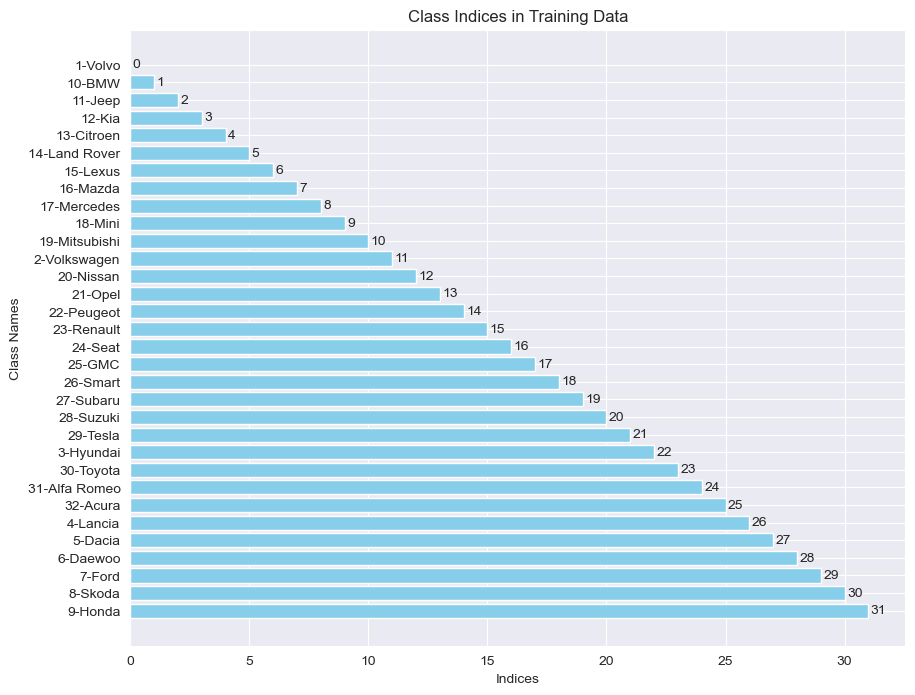

In [12]:
import matplotlib.pyplot as plt


class_names = train_generator.class_indices
class_names_items = class_names.items()


labels, indices = zip(*class_names_items)


plt.figure(figsize=(10, 8))
bars = plt.barh(labels, indices, color='skyblue')
plt.xlabel('Indices')
plt.ylabel('Class Names')
plt.title('Class Indices in Training Data')


for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 0.1  
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, str(width), va='center')


plt.gca().invert_yaxis()


plt.show()


In [13]:
import numpy as np


idx_to_labels = {y: x for x, y in train_generator.class_indices.items()}


np.save('idx_to_labels.npy', idx_to_labels)


labels_to_idx = train_generator.class_indices
np.save('labels_to_idx.npy', labels_to_idx)


In [14]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import layers, Model
from keras.layers import ReLU, Add, GlobalAveragePooling2D, Dense,MaxPooling2D
import numpy as np
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K

# 通道注意力机制
def channel_attention(input_feature):
    channel_axis = -1  
    channels = input_feature.shape[channel_axis]

    shared_layer_one = Dense(channels // 8,
                             activation='relu',
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')
    shared_layer_two = Dense(channels,
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')

    avg_pooling = GlobalAveragePooling2D()(input_feature)    
    avg_pooling = Reshape((1, 1, channels))(avg_pooling)
    avg_pooling = shared_layer_one(avg_pooling)
    avg_pooling = shared_layer_two(avg_pooling)

    max_pooling = GlobalMaxPooling2D()(input_feature)
    max_pooling = Reshape((1, 1, channels))(max_pooling)
    max_pooling = shared_layer_one(max_pooling)
    max_pooling = shared_layer_two(max_pooling)

    x = Add()([avg_pooling, max_pooling])
    x = Activation('sigmoid')(x)

    return multiply([input_feature, x])
#

# 空间注意力机制
def spatial_attention(input_feature):
    kernel_size = 7

    avg_pool = Lambda(lambda x: K.mean(x, axis=-1, keepdims=True))(input_feature)
    max_pool = Lambda(lambda x: K.max(x, axis=-1, keepdims=True))(input_feature)
    concat = Concatenate(axis=-1)([avg_pool, max_pool])
    
    x = Conv2D(filters=1,
               kernel_size=kernel_size,
               strides=1, 
               padding='same',
               activation='sigmoid',
               kernel_initializer='he_normal',
               use_bias=False)(concat)                   

    return multiply([input_feature, x])


In [16]:
from keras.layers import Add

def residual_block(input_tensor, filters, kernel_size=3, stride=1):
    # 主路径
    x = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)

    # 残差路径
    shortcut = input_tensor
    if stride != 1 or input_tensor.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=stride, padding='same')(input_tensor)
        shortcut = BatchNormalization()(shortcut)

    # 将残差路径的输出加到主路径上
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    
    return x


In [17]:
def res_block(input_shape, filters, strides=1):
    #
    shortcut = input_shape

    x = Conv2D(filters, (1,1), strides=1, padding='same')(input_shape)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters, (3,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(filters, (1,3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters*4, (1,1), padding='same')(x)
    x = BatchNormalization()(x)
    # Skip connection
    if strides !=1 or shortcut.shape[-1]!= filters*4:
        shortcut = Conv2D(filters*4, (1,1), strides=strides, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)
   
    x = Add()([x, shortcut])
    x = ReLU()(x)
    
    return x

In [18]:
def inception_module(input_tensor, filter_channels):
   
    branch_1x1 = Conv2D(filter_channels, (1,1), padding='same', activation='relu')(input_tensor)

    # 1x7 conv branch
    # First 1x1 conv
    branch_1x7 = Conv2D(filter_channels, (1,1), padding='same', activation='relu')(input_tensor)
    # 1x7 conv
    branch_1x7 = Conv2D(filter_channels, (1,7), padding='same', activation='relu')(branch_1x7)
    # 7x1 conv
    branch_1x7 = Conv2D(filter_channels, (7,1), padding='same', activation='relu')(branch_1x7)

    # 7x1 followed by 1x7 conv branch (double)
    # First 1x1 conv
    branch_7x1_double = Conv2D(filter_channels, (1,1), padding='same', activation='relu')(input_tensor)
    # First 7x1 conv
    branch_7x1_double = Conv2D(filter_channels, (7,1), padding='same', activation='relu')(branch_7x1_double)
    # Second 1x7 conv
    branch_7x1_double = Conv2D(filter_channels, (1,7), padding='same', activation='relu')(branch_7x1_double)
    # Second 7x1 conv
    branch_7x1_double = Conv2D(filter_channels, (7,1), padding='same', activation='relu')(branch_7x1_double)

    # Concatenate all the branches
  
    output=Concatenate(axis=-1)([branch_1x1, branch_1x7, branch_7x1_double])

    return output

In [19]:
import tensorflow as tf

def custom_categorical_crossentropy(y_true, y_pred, label_smoothing=0.1):
  
    num_classes = tf.cast(tf.shape(y_true)[-1], tf.float32)
    epsilon = tf.keras.backend.epsilon()
    
   
    y_true_smoothed = y_true * (1.0 - label_smoothing) + (label_smoothing / num_classes)
    
 
    y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
    
  
    cce = -tf.reduce_sum(y_true_smoothed * tf.math.log(y_pred), axis=-1)
    return tf.reduce_mean(cce)

def custom_categorical_accuracy(y_true, y_pred, threshold=0.5):
    
    y_pred_thresholded = tf.cast(y_pred > threshold, tf.float32)
    

    correct_predictions = tf.equal(tf.round(y_true), tf.round(y_pred_thresholded))
    
 
    accuracy = tf.reduce_mean(tf.cast(tf.reduce_all(correct_predictions, axis=-1), tf.float32))
    return accuracy


In [20]:
from keras import layers, Model

In [21]:
input_img = layers.Input(shape=(128, 128, 3))

In [24]:
input_1 = input_img
x = Conv2D(96, kernel_size=(11, 11), strides=4, activation='relu')(input_1)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)
# 添加残差模块
x = residual_block(x, 96)

x = Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)

# 使用深度可分离卷积层
#x = depthwise_separable_conv(x, 384)

x = Conv2D(384, kernel_size=(1, 3), activation='relu', padding='same')(x)
x = channel_attention(x)
x = spatial_attention(x)
x = Conv2D(256, kernel_size=(3, 1), activation='relu', padding='same',name='last_conv_model_1')(x)
x = channel_attention(x)
x = spatial_attention(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)

model_1_output = GlobalAveragePooling2D()(x)
test_output1 = Dense(32, activation='softmax')(model_1_output)

model_1 = Model(inputs=input_1, outputs=model_1_output)
model_1_test=Model(inputs=input_1, outputs=test_output1)

In [25]:
model_1_test.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 30, 30, 96)   34944       ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 30, 30, 96)  384         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                            

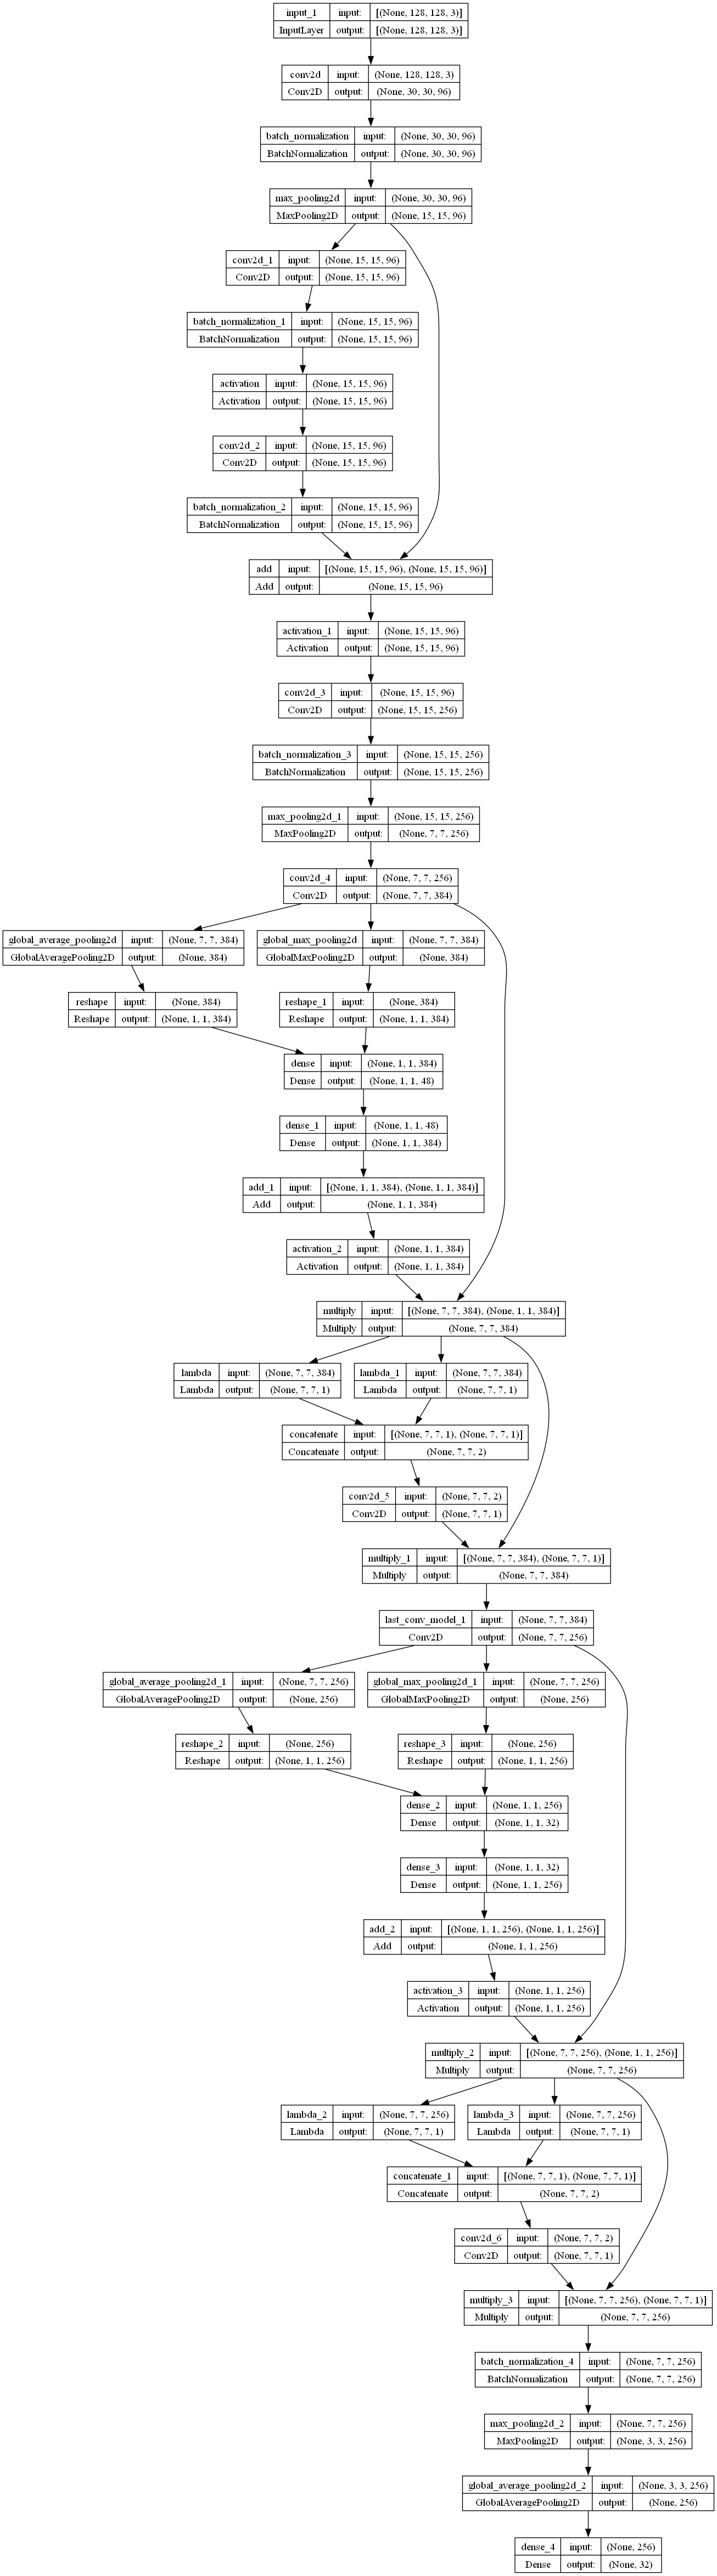

In [26]:
from keras.utils.vis_utils import plot_model
plot_model(model_1_test, to_file='model_1_test.png', show_shapes=True, show_layer_names=True) 

In [34]:
learning_rate1 = 0.0001
epochs1 = 1
model_1_test.compile(loss='categorical_crossentropy', optimizer= Adam(learning_rate=learning_rate1), metrics=['accuracy'])

In [30]:
learning_rate1 = 0.0001
epochs1 = 1
model_1_test.compile(loss=custom_categorical_crossentropy, optimizer= Adam(learning_rate=learning_rate1), metrics=[custom_categorical_accuracy])

In [35]:
history1 = model_1_test.fit(train_generator, validation_data=validation_generator, epochs=epochs1)

700/700 [==============================] - 56s 76ms/step - loss: 1.1012 - accuracy: 0.7129 - val_loss: 0.3937 - val_accuracy: 0.8896


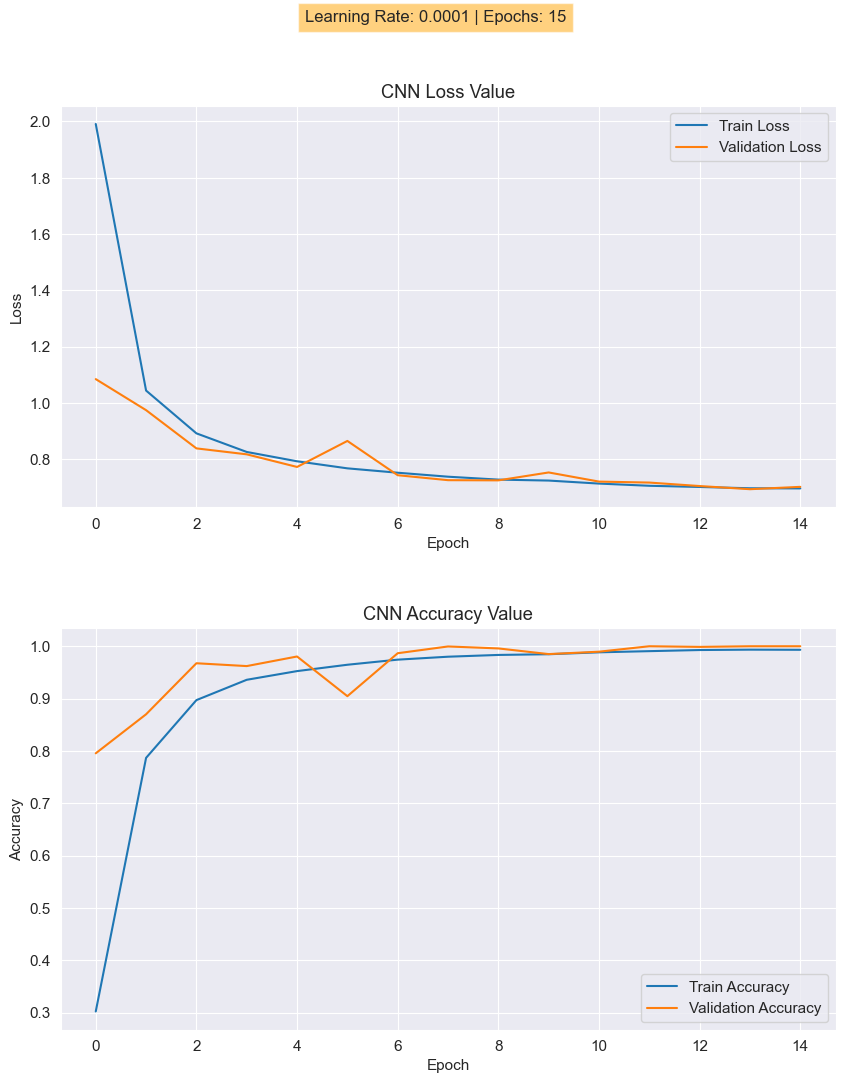

In [480]:
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# 绘制损失值
ax1.plot(history1.history['loss'], label='Train Loss')
ax1.plot(history1.history['val_loss'], label='Validation Loss')
ax1.set_title("CNN Loss Value")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# 绘制准确率
ax2.plot(history1.history['custom_categorical_accuracy'], label='Train Accuracy')
ax2.plot(history1.history['val_custom_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title("CNN Accuracy Value")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)
# 在图表的顶部中央位置显示训练配置信息
info_text = f"Learning Rate: {learning_rate1} | Epochs: {epochs1}"
plt.figtext(0.5, 0.95, info_text, ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
# 调整子图间距
plt.subplots_adjust(hspace=0.3)  # 增加子图之间的垂直空间

# 显示图表
plt.show()


150/150 [==============================] - 6s 42ms/step - loss: 0.3865 - accuracy: 0.8967
Test loss: 0.38653355836868286
Test accuracy: 0.8966666460037231


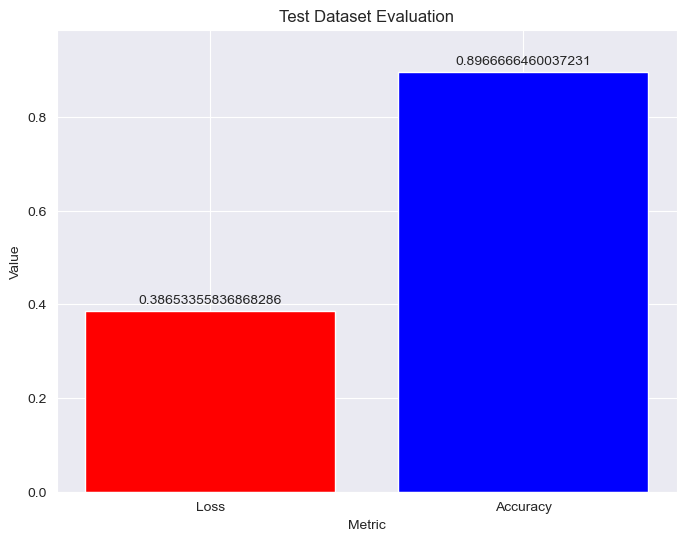

In [36]:
import matplotlib.pyplot as plt

# Assuming you have these variables from your model evaluation
test_loss, test_acc = model_1_test.evaluate(test_generator)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

# Data preparation for bar chart
metrics = ['Loss', 'Accuracy']
values = [test_loss, test_acc]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['red', 'blue'])

# Setting chart title and axis labels
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Test Dataset Evaluation')

# Set y-axis limit slightly higher than the highest value for better display
plt.ylim(0, max(values) * 1.1)

# Displaying the full values on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height}', ha='center', va='bottom')  # Changed formatting here

plt.show()


In [37]:
# Model 2
input_2 = input_img

x = Conv2D(64, (7,7), activation='relu')(input_2)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = Conv2D(128, (3,3), activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (1,1), activation='relu',name='last_conv_model_2')(x)
x = BatchNormalization()(x)

x = channel_attention(x)
x = spatial_attention(x)
# 添加通道注意力和空间注意力机制

x = inception_module(x, 64)
x = MaxPooling2D(2,2)(x)

x = inception_module(x, 64)
x = MaxPooling2D(2,2)(x)

x = inception_module(x, 64)
x = MaxPooling2D(2,2)(x)

x = inception_module(x, 64)
x = MaxPooling2D(2,2)(x)



model_2_output= GlobalAveragePooling2D()(x)
test_output2 = Dense(32, activation='softmax')(model_2_output)


model_2 = Model(inputs=input_2, outputs=model_2_output)
model_2_test=Model(inputs=input_1, outputs=test_output2)

In [38]:
model_2_test.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_7 (Conv2D)              (None, 122, 122, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 122, 122, 64  256        ['conv2d_7[0][0]']               
 rmalization)                   )                                                           

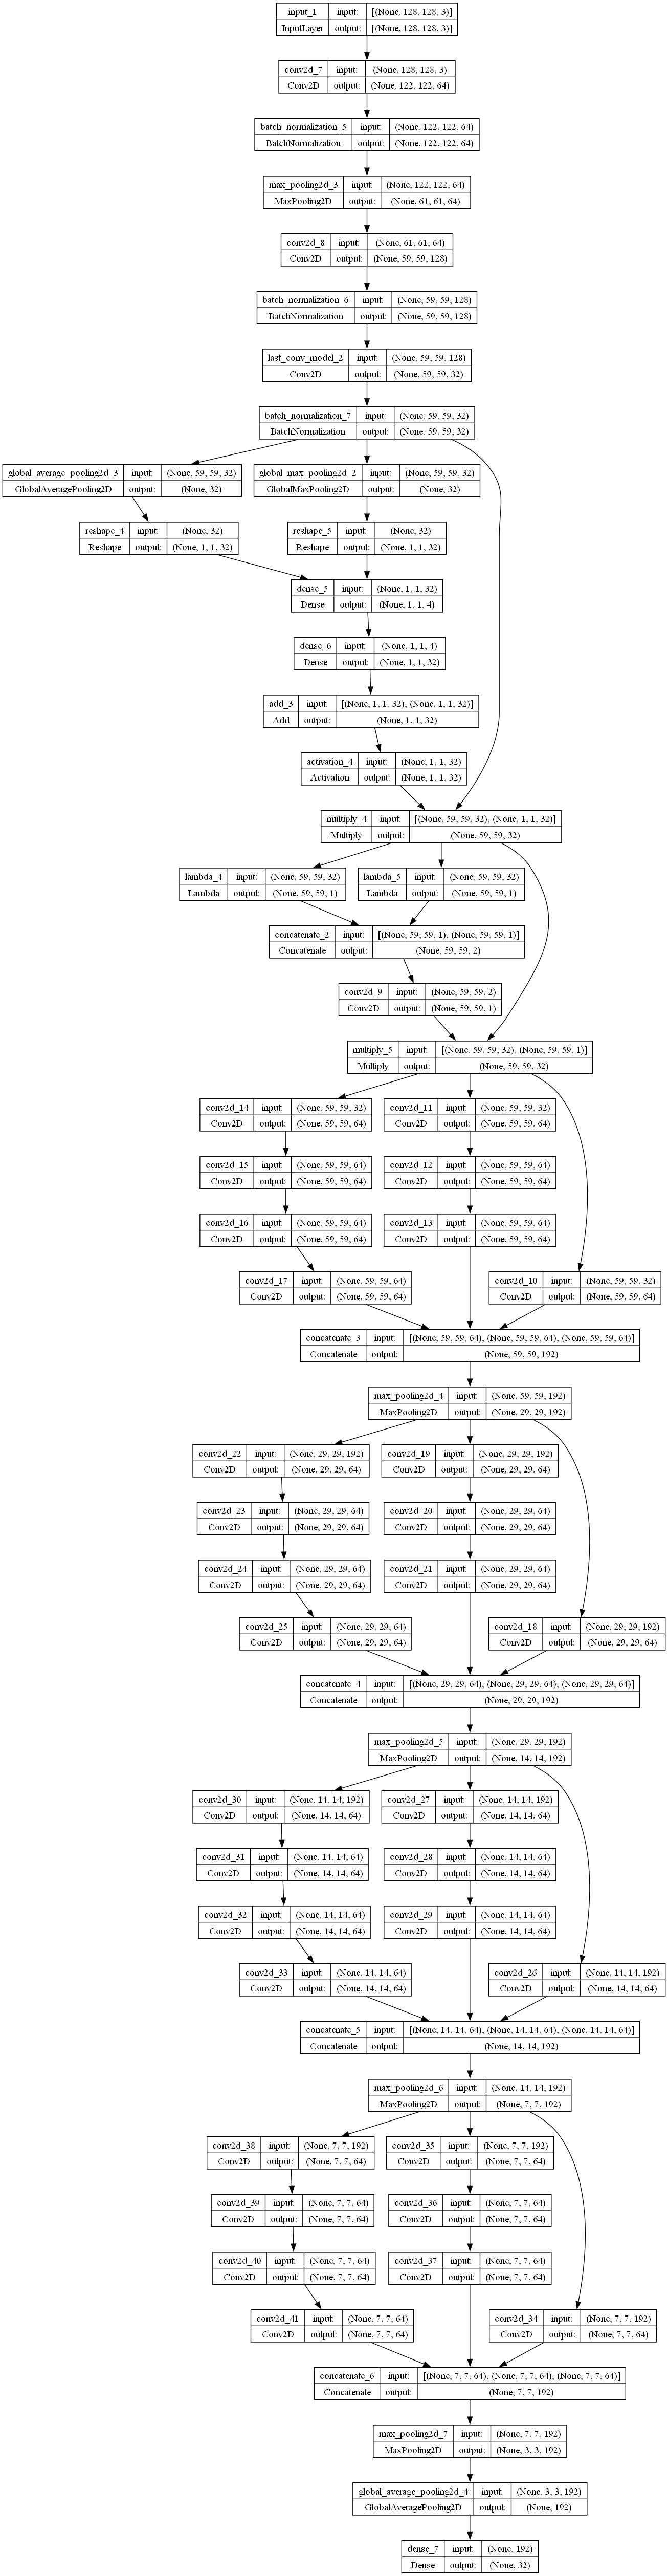

In [39]:
plot_model(model_2_test, to_file='model_2_test.png', show_shapes=True, show_layer_names=True) 

In [41]:
learning_rate1 =0.001
epochs1 = 1
model_2_test.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate1),
                     metrics=['accuracy'])

In [52]:
learning_rate1 = 0.001
epochs1 = 3
model_2_test.compile(loss=custom_categorical_crossentropy, optimizer= Adam(learning_rate=learning_rate1), metrics=[custom_categorical_accuracy])

In [50]:

history2 = model_2_test.fit(train_generator, validation_data=validation_generator, epochs=epochs1)

700/700 [==============================] - 61s 81ms/step - loss: 1.1265 - custom_categorical_accuracy: 0.7679 - val_loss: 0.8199 - val_custom_categorical_accuracy: 0.9821


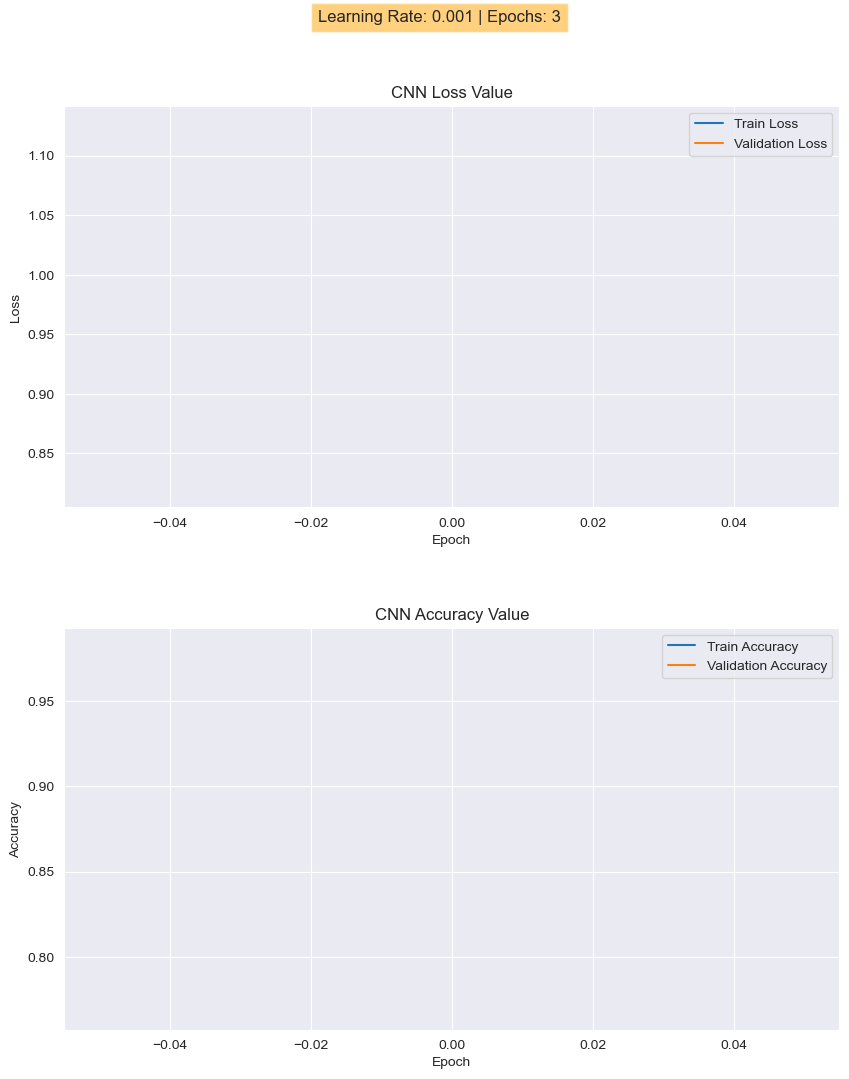

In [53]:
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))


ax1.plot(history2.history['loss'], label='Train Loss')
ax1.plot(history2.history['val_loss'], label='Validation Loss')
ax1.set_title("CNN Loss Value")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)


ax2.plot(history2.history['custom_categorical_accuracy'], label='Train Accuracy')
ax2.plot(history2.history['val_custom_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title("CNN Accuracy Value")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

info_text = f"Learning Rate: {learning_rate1} | Epochs: {epochs1}"
plt.figtext(0.5, 0.95, info_text, ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

plt.subplots_adjust(hspace=0.3)  # 增加子图之间的垂直空间


plt.show()


150/150 [==============================] - 5s 31ms/step - loss: 0.1102 - accuracy: 0.9650
Test loss: 0.11019467562437057
Test accuracy: 0.9649999737739563


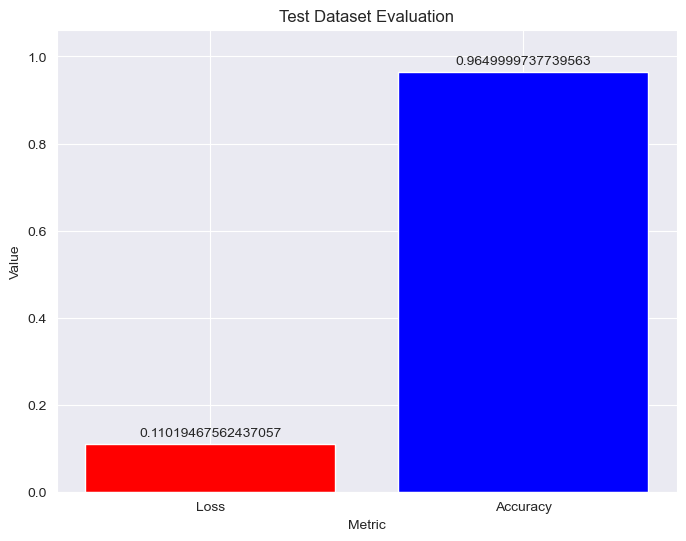

In [45]:
import matplotlib.pyplot as plt

# Assuming you have these variables from your model evaluation
test_loss, test_acc = model_2_test.evaluate(test_generator)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

# Data preparation for bar chart
metrics = ['Loss', 'Accuracy']
values = [test_loss, test_acc]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['red', 'blue'])

# Setting chart title and axis labels
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Test Dataset Evaluation')

# Set y-axis limit slightly higher than the highest value for better display
plt.ylim(0, max(values) * 1.1)

# Displaying the full values on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height}', ha='center', va='bottom')  # Changed formatting here

plt.show()


In [61]:
# Ensemble Model
merged_output = Concatenate()([model_1_output, model_2_output])
x = Dense(128, activation='relu')(merged_output)
final_output = Dense(32, activation='softmax')(x)
ensemble_model = Model(inputs=input_img, outputs=final_output)

In [59]:
ensemble_model.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_7 (Conv2D)              (None, 122, 122, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 122, 122, 64  256        ['conv2d_7[0][0]']               
 rmalization)                   )                                                           

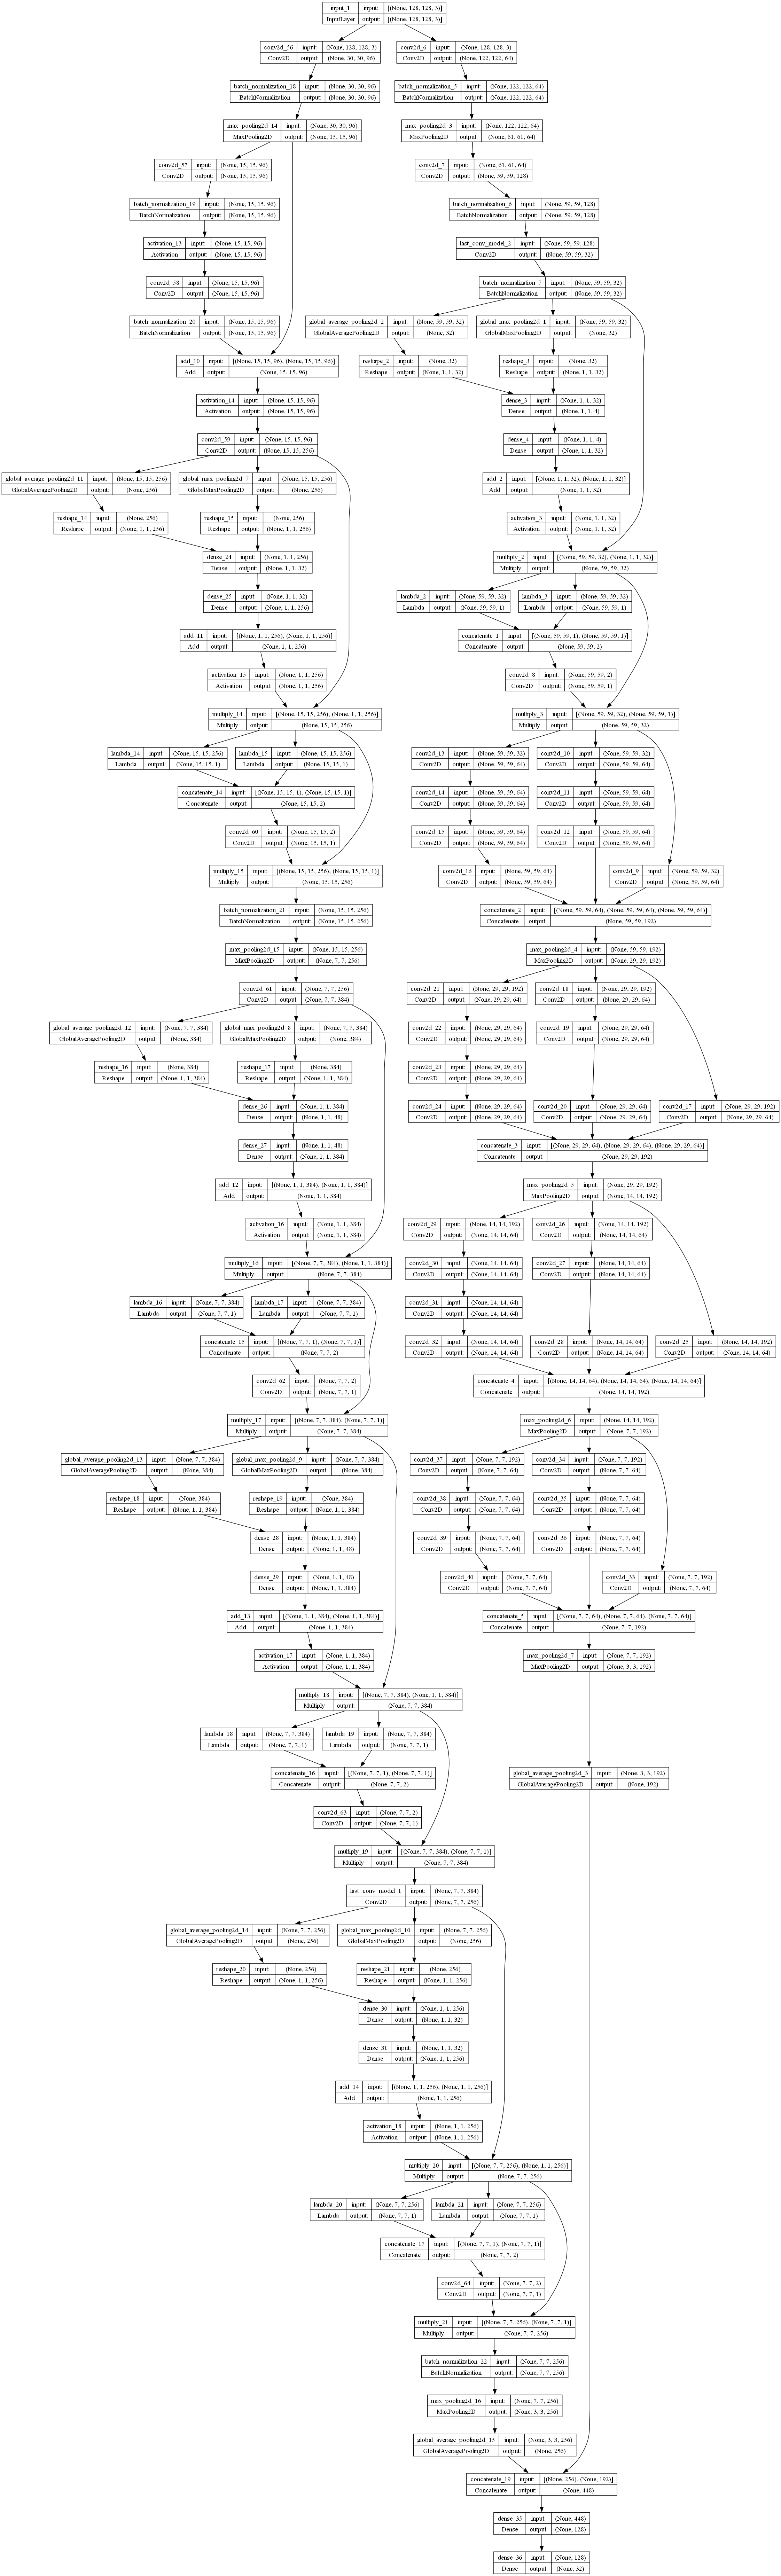

In [126]:
plot_model(ensemble_model, to_file='ensemble_model_plot.png', show_shapes=True, show_layer_names=True) 

In [62]:
ensemble_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [87]:
learning_rate1 = 0.0001 
epochs1 = 1
ensemble_model.compile(loss=custom_categorical_crossentropy, optimizer= Adam(learning_rate=learning_rate1), metrics=[custom_categorical_accuracy])

In [63]:
learning_rate1 = 0.0001 
epochs1 = 4

history = ensemble_model.fit(train_generator, validation_data=validation_generator, epochs=epochs1)

Epoch 1/4
700/700 [==============================] - 65s 85ms/step - loss: 0.5558 - accuracy: 0.8363 - val_loss: 0.2029 - val_accuracy: 0.9333
Epoch 2/4
700/700 [==============================] - 56s 80ms/step - loss: 0.1592 - accuracy: 0.9512 - val_loss: 0.0568 - val_accuracy: 0.9837
Epoch 3/4
700/700 [==============================] - 57s 81ms/step - loss: 0.1349 - accuracy: 0.9602 - val_loss: 0.0286 - val_accuracy: 0.9867
Epoch 4/4
700/700 [==============================] - 56s 81ms/step - loss: 0.0854 - accuracy: 0.9749 - val_loss: 0.0015 - val_accuracy: 1.0000


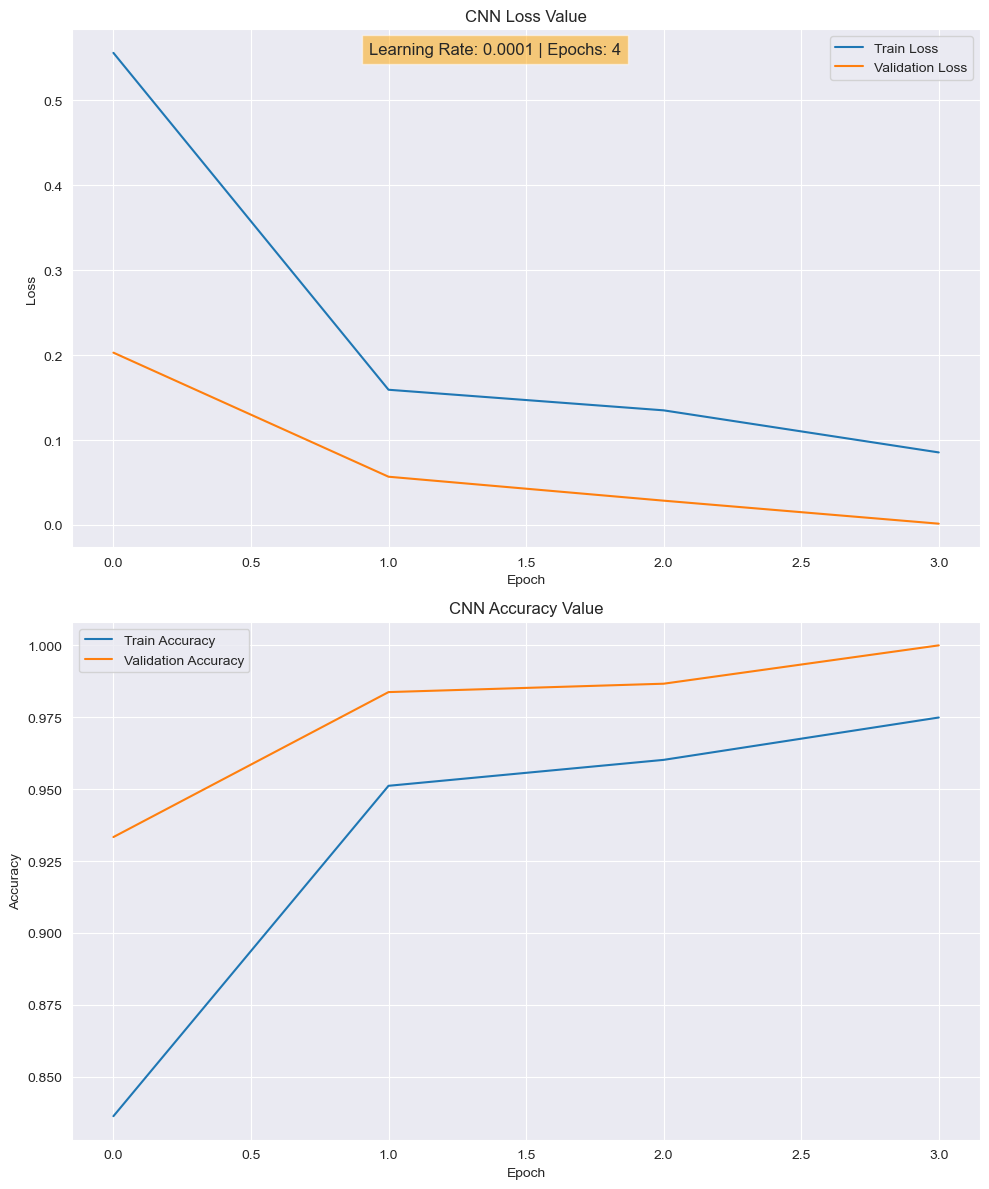

In [64]:
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))


ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title("CNN Loss Value")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)


ax2.plot(history.history['accuracy'], label='Train Accuracy')  # 更新这里
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')  # 更新这里
ax2.set_title("CNN Accuracy Value")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)


plt.subplots_adjust(hspace=0.5)  


info_text = f"Learning Rate: {learning_rate1} | Epochs: {epochs1}"
plt.figtext(0.5, 0.95, info_text, ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.show()


150/150 [==============================] - 5s 34ms/step - loss: 0.0012 - accuracy: 1.0000
Test loss: 0.0011662584729492664
Test accuracy: 1.0


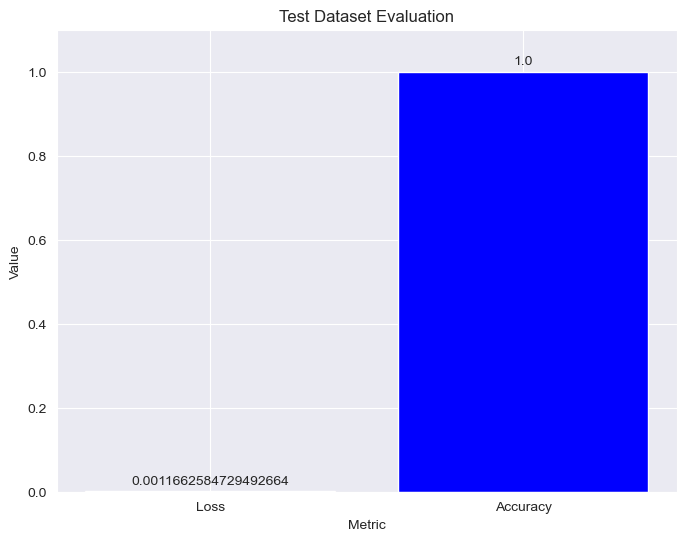

In [65]:
import matplotlib.pyplot as plt

# Assuming you have these variables from your model evaluation
test_loss, test_acc = ensemble_model.evaluate(test_generator)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

# Data preparation for bar chart
metrics = ['Loss', 'Accuracy']
values = [test_loss, test_acc]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['red', 'blue'])

# Setting chart title and axis labels
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Test Dataset Evaluation')

# Set y-axis limit slightly higher than the highest value for better display
plt.ylim(0, max(values) * 1.1)

# Displaying the full values on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height}', ha='center', va='bottom')  # Changed formatting here

plt.show()


150/150 [==============================] - 6s 27ms/step


IndexError: index 4 is out of bounds for axis 0 with size 4

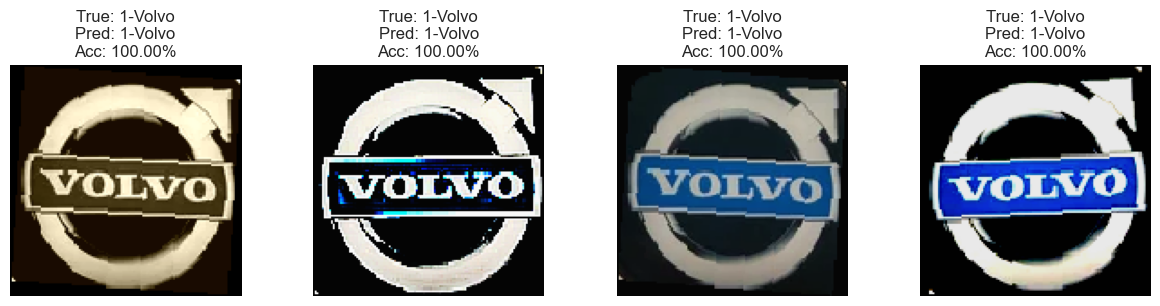

In [66]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np


predictions = ensemble_model.predict(test_generator)


true_labels = test_generator.classes


class_labels = list(test_generator.class_indices.keys())


fig, axes = plt.subplots(1, 4, figsize=(15, 3))  # 5张图，每张图3x3大小


for i in range(5):  #
    img = image.load_img(os.path.join(test_dir, test_generator.filenames[i]), target_size=(128, 128))
    axes[i].imshow(img)
    
    
    predicted_label = class_labels[np.argmax(predictions[i])]
    true_label = class_labels[true_labels[i]]
    accuracy = np.max(predictions[i]) * 100
    
    
    axes[i].set_title(f"True: {true_label}\nPred: {predicted_label}\nAcc: {accuracy:.2f}%")
    
    axes[i].axis('off')

plt.tight_layout()
plt.show()


150/150 [==============================] - 5s 30ms/step


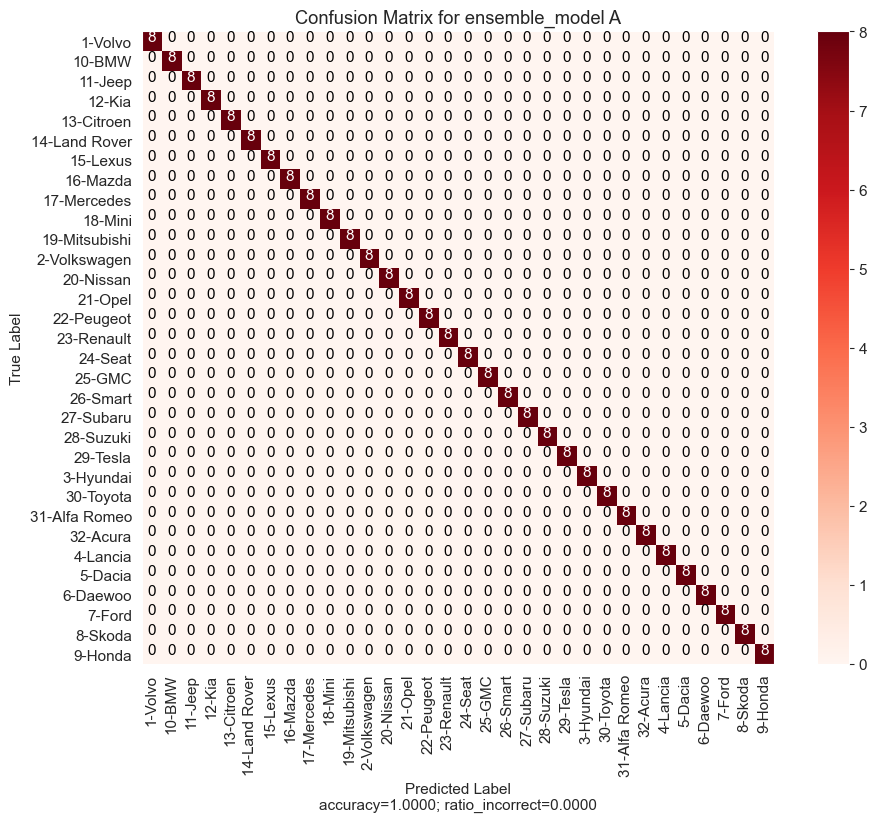

In [69]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(test_generator, ensemble_model, model_name):
    plt.rcParams.update({'font.size': 11})
    labels = test_generator.classes
    predictions = ensemble_model.predict(test_generator, steps=len(test_generator))
    preds = np.argmax(predictions, axis=1)
    plot_labels = [k for k, v in test_generator.class_indices.items()]
    cm = tf.math.confusion_matrix(labels, preds)
    cm = np.clip(cm, 0, 8)
    ratio_correct = np.trace(cm) / np.sum(cm)
    ratio_incorrect = 1 - ratio_correct
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap='Reds')
    plt.colorbar()

    ticks = np.arange(len(plot_labels))
    plt.xticks(ticks, plot_labels, rotation=90)
    plt.yticks(ticks, plot_labels)

    plt.title(f'Confusion Matrix for {model_name}')
    plt.grid(False)

    threshold = 4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:,}".format(cm[i, j]),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > threshold else 'black')
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label\naccuracy={:0.4f}; ratio_incorrect={:0.4f}'.format(
        ratio_correct, ratio_incorrect
    ))
plot_confusion_matrix(test_generator, ensemble_model, 'ensemble_model A')

150/150 [==============================] - 5s 30ms/step


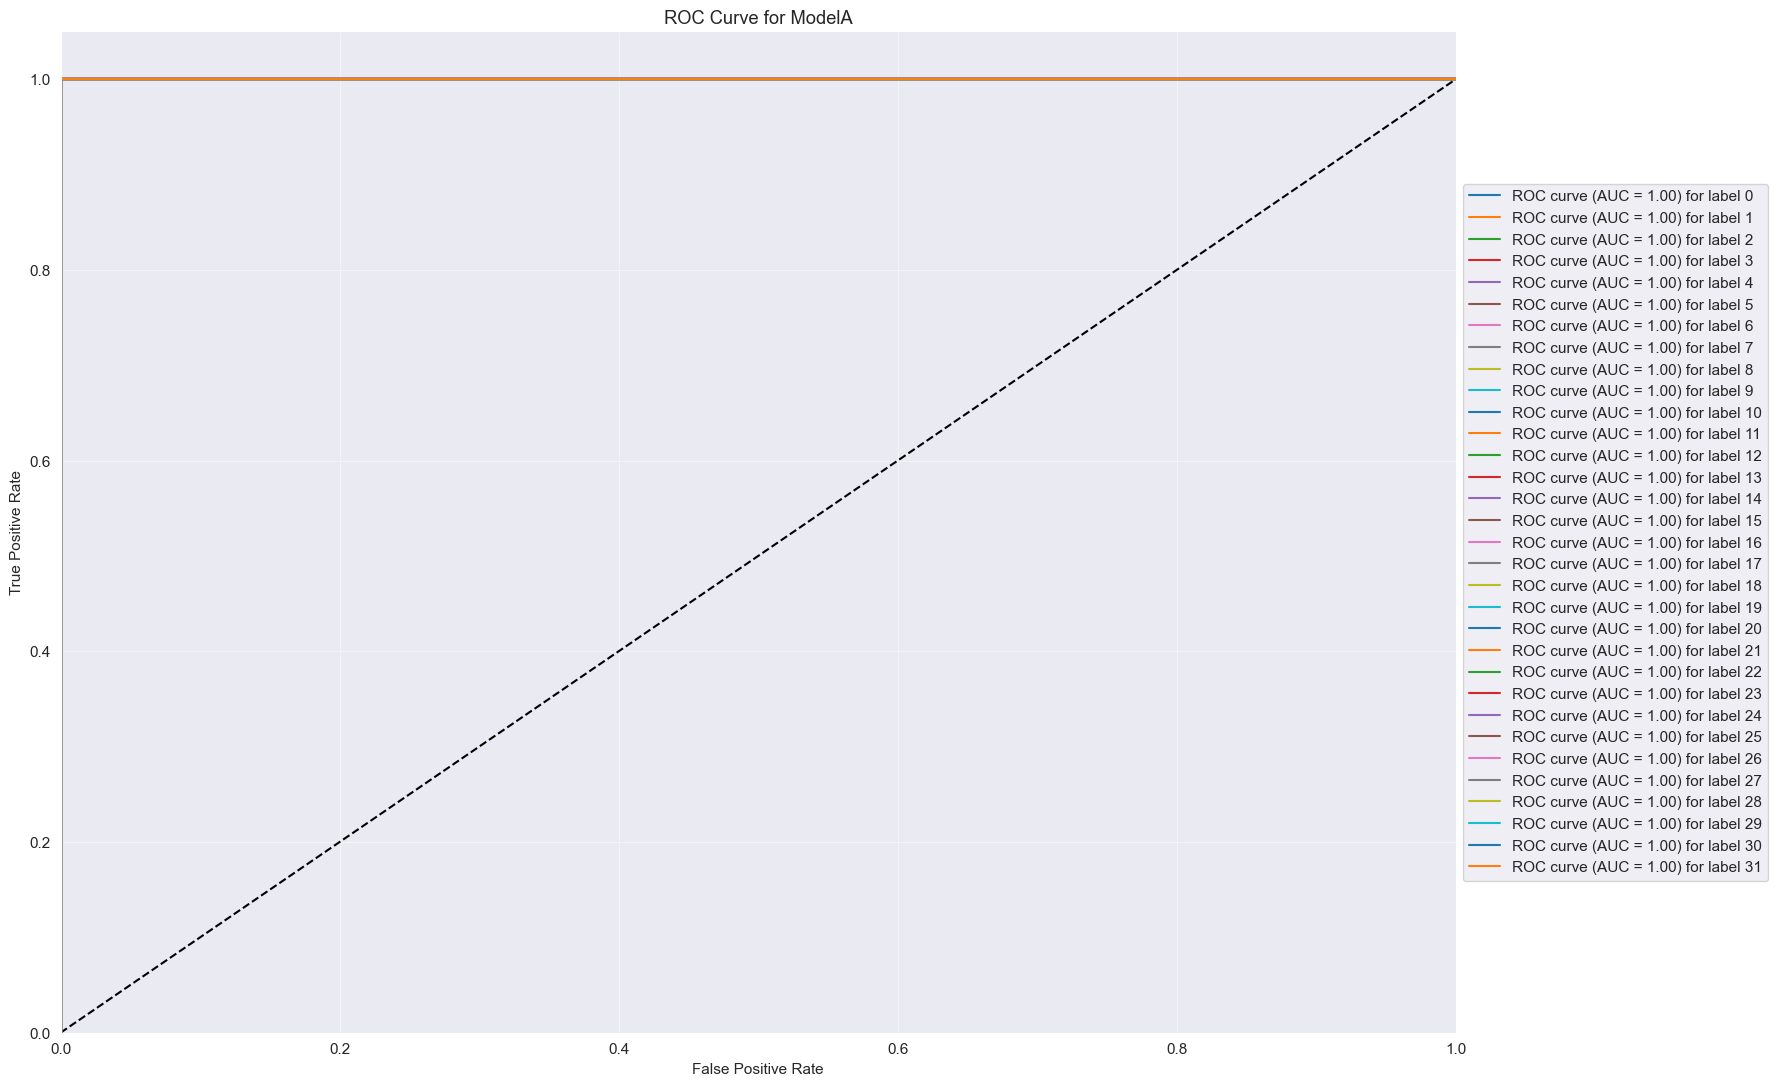

In [70]:
from sklearn.metrics import roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_roc_curve(ensemble_model, test_generator, model_name):
    y_true = test_generator.classes
    predictions = ensemble_model.predict(test_generator, steps=len(test_generator), verbose=1)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(32):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fig, ax = plt.subplots(figsize=(18, 13))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve for {model_name}')

    for i in range(32):
        ax.plot(fpr[i], tpr[i], label='ROC curve (AUC = %0.2f) for label %i' % (roc_auc[i], i))

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# 使用方式：
plot_roc_curve(ensemble_model, test_generator, 'ModelA')

150/150 [==============================] - 4s 29ms/step


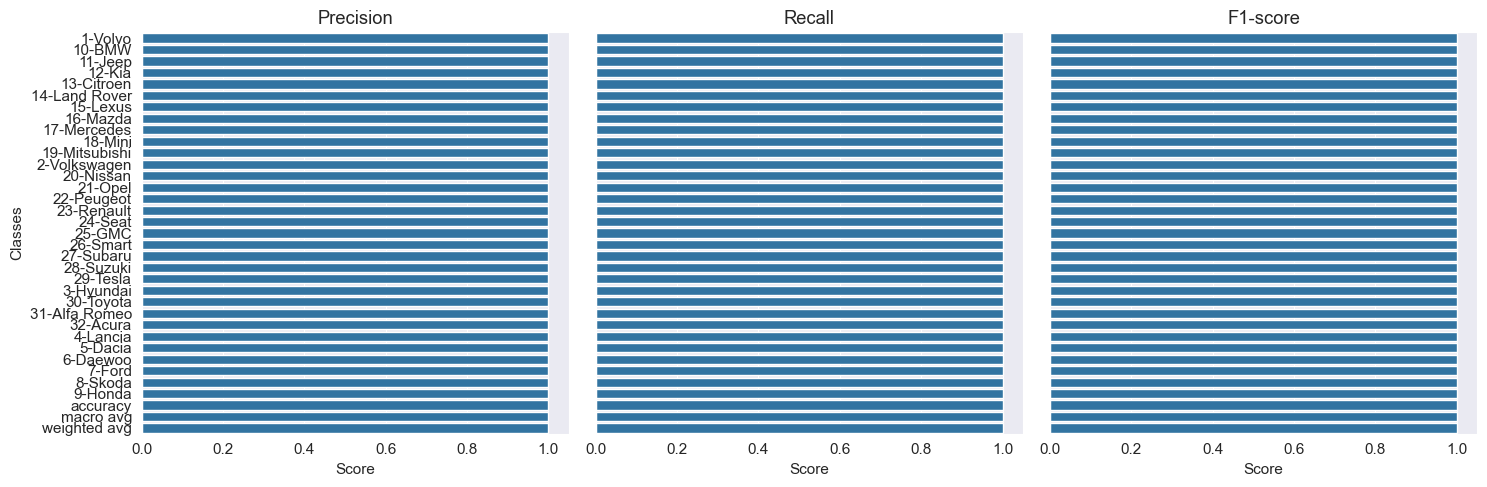

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
def plot_classification_report(df):
    """
    Plot the classification report as a set of bar plots.
    """
    # 过滤掉'support'列和'accuracy'行（如果存在）
    metrics = df.drop(columns=['support'], errors='ignore')
    metrics = metrics.drop('accuracy', errors='ignore')

    # 绘制条形图
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
    metrics = ["precision", "recall", "f1-score"]
    for idx, metric in enumerate(metrics):
        sns.barplot(x=df[metric], y=df.index, ax=axes[idx])
        axes[idx].set_title(metric.capitalize())
        axes[idx].set_xlabel('Score')
        axes[idx].set_ylabel('Classes')

    plt.tight_layout()
    plt.show()

# 使用该函数
df_report = class_report(validation_generator, ensemble_model, test_generator)
plot_classification_report(df_report)


In [72]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

def class_report(validation_generator, ensemble_model, test_generator):
    predictions = ensemble_model.predict(test_generator, steps=len(test_generator), verbose=1)
    preds = np.argmax(predictions, axis=1)
    labels = validation_generator.classes
    names = np.array([i for i in validation_generator.class_indices.keys()])
    report_dict = classification_report(labels, preds, target_names=names, output_dict=True)
    df = pd.DataFrame.from_dict(report_dict).transpose()
    return df

class_report(validation_generator, ensemble_model, test_generator)

150/150 [==============================] - 5s 29ms/step


precision  recall  f1-score  support
1-Volvo              1.0     1.0       1.0     75.0
10-BMW               1.0     1.0       1.0     75.0
11-Jeep              1.0     1.0       1.0     75.0
12-Kia               1.0     1.0       1.0     75.0
13-Citroen           1.0     1.0       1.0     75.0
14-Land Rover        1.0     1.0       1.0     75.0
15-Lexus             1.0     1.0       1.0     75.0
16-Mazda             1.0     1.0       1.0     75.0
17-Mercedes          1.0     1.0       1.0     75.0
18-Mini              1.0     1.0       1.0     75.0
19-Mitsubishi        1.0     1.0       1.0     75.0
2-Volkswagen         1.0     1.0       1.0     75.0
20-Nissan            1.0     1.0       1.0     75.0
21-Opel              1.0     1.0       1.0     75.0
22-Peugeot           1.0     1.0       1.0     75.0
23-Renault           1.0     1.0       1.0     75.0
24-Seat              1.0     1.0       1.0     75.0
25-GMC               1.0     1.0       1.0     75.0
26-Smart             1.0     1.0       1.0     75.0
27-Subaru            1.0     1.0       1.0     75.0
28-Suzuki            1.0     1.0       1.0     75.0
29-Tesla             1.0     1.0       1.0     75.0
3-Hyundai            1.0     1.0       1.0     75.0
30-Toyota            1.0     1.0       1.0     75.0
31-Alfa Romeo        1.0     1.0       1.0     75.0
32-Acura             1.0     1.0       1.0     75.0
4-Lancia             1.0     1.0       1.0     75.0
5-Dacia              1.0     1.0       1.0     75.0
6-Daewoo             1.0     1.0       1.0     75.0
7-Ford               1.0     1.0       1.0     75.0
8-Skoda              1.0     1.0       1.0     75.0
9-Honda              1.0     1.0       1.0     75.0
accuracy             1.0     1.0       1.0      1.0
macro avg            1.0     1.0       1.0   2400.0
weighted avg         1.0     1.0       1.0   2400.0

150/150 [==============================] - 4s 25ms/step
Sensitivity: 1.0, Specificity: 1.0


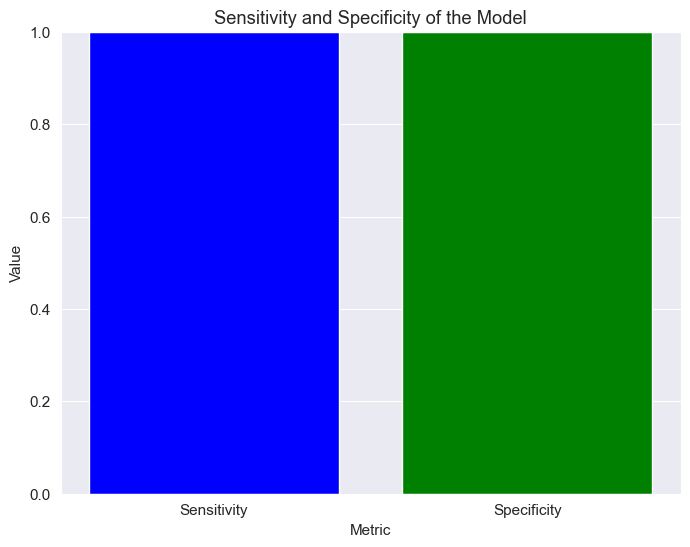

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

def sensitivity_specificity(ensemble_model, test_generator):
    # 获取验证集上的真实标签
    y_true = test_generator.classes

    # 使用模型进行预测
    predictions = ensemble_model.predict(test_generator, steps=len(test_generator), verbose=1)
    y_pred = np.argmax(predictions, axis=1)

    # 计算混淆矩阵
    cm = confusion_matrix(y_true, y_pred)

    # 计算敏感性和特异性
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    return sensitivity, specificity

# 使用模型
sensitivity, specificity = sensitivity_specificity(ensemble_model, test_generator)

# 打印结果
print(f'Sensitivity: {sensitivity}, Specificity: {specificity}')

# 绘制柱状图
metrics = ['Sensitivity', 'Specificity']
values = [sensitivity, specificity]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green'])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Sensitivity and Specificity of the Model')
plt.ylim(0, 1)  # 限制y轴的范围为0到1
plt.show()


In [41]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

150/150 [==============================] - 4s 26ms/step


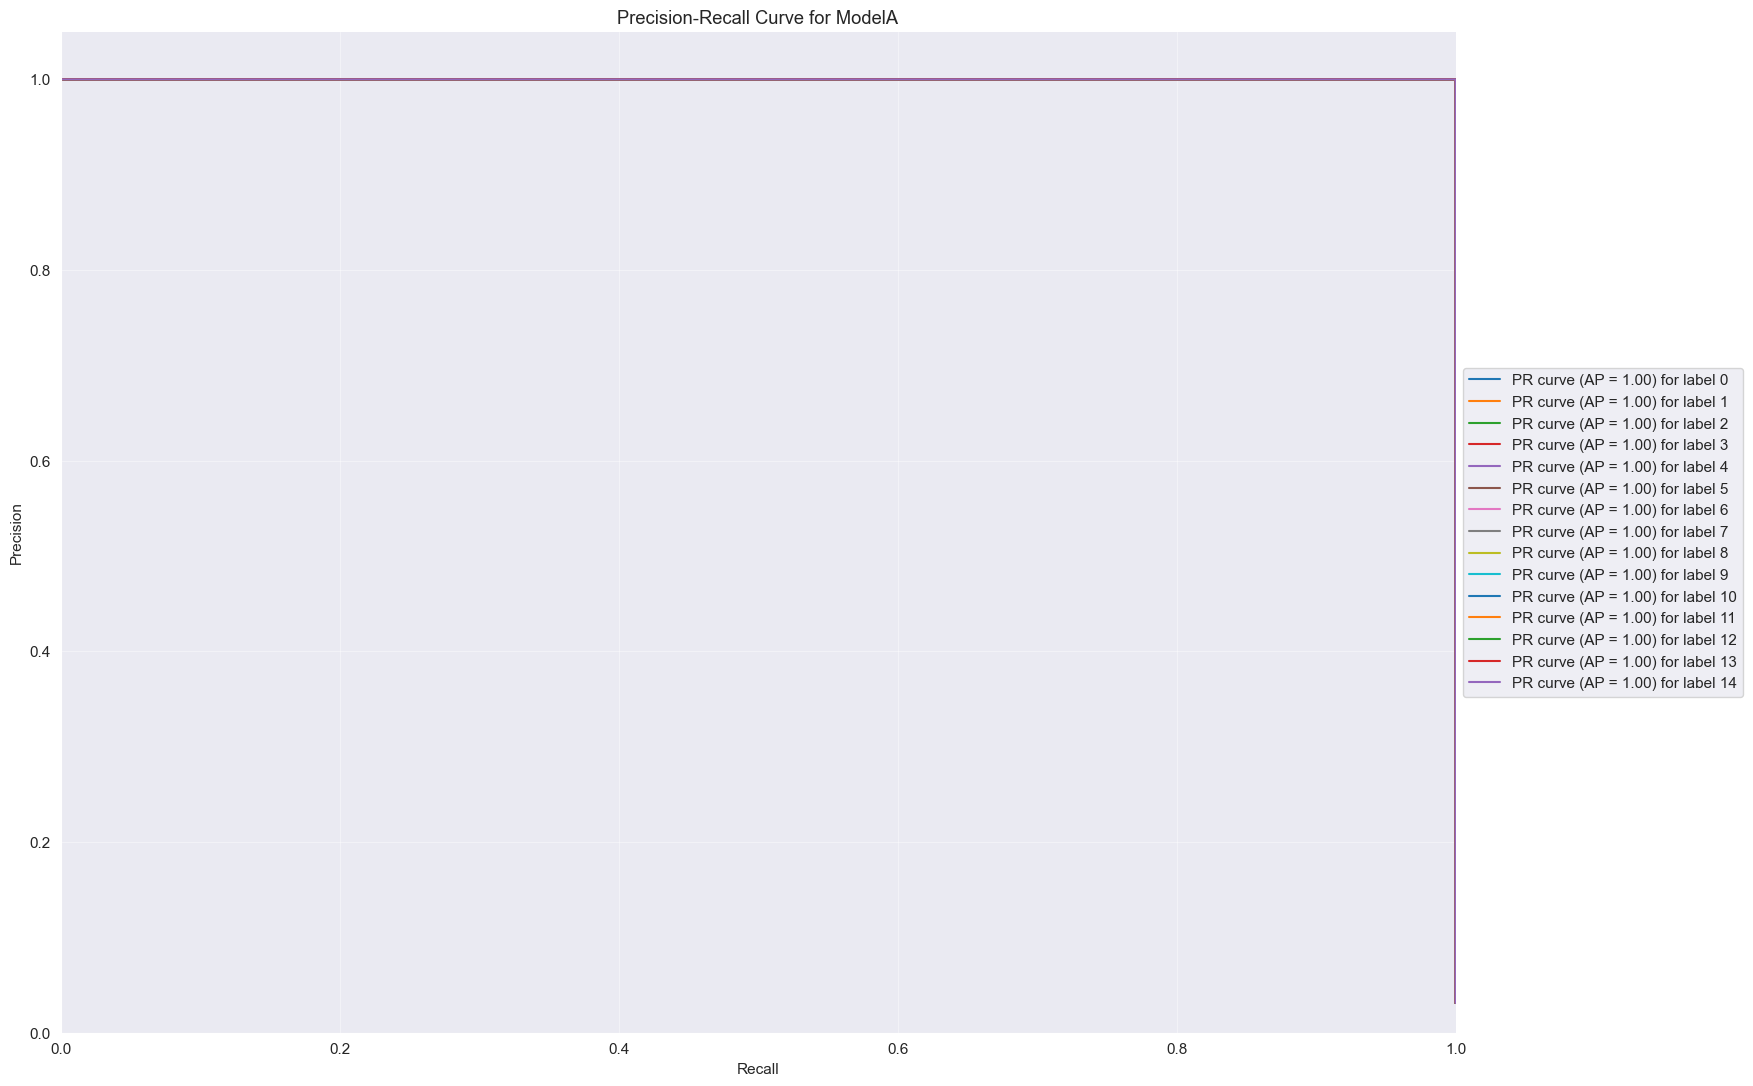

In [42]:
def plot_precision_recall_curve(ensemble_model, test_generator, model_name):
    
    y_true = test_generator.classes  # Corrected from test_dataset to test_generator

    
    predictions = ensemble_model.predict(test_generator, steps=len(test_generator), verbose=1)

    # Initialize Precision and Recall dictionaries
    precision = dict()
    recall = dict()
    average_precision = dict()

    # Calculate Precision and Recall for each class
    for i in range(15):  # Assuming you have 15 classes
        precision[i], recall[i], _ = precision_recall_curve(y_true == i, predictions[:, i])
        average_precision[i] = auc(recall[i], precision[i])

    # Plot Precision-Recall curve
    fig, ax = plt.subplots(figsize=(18, 13))
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'Precision-Recall Curve for {model_name}')

    for i in range(15):
        ax.plot(recall[i], precision[i], label='PR curve (AP = %0.2f) for label %i' % (average_precision[i], i))

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_precision_recall_curve(ensemble_model, test_generator, 'ModelA')


In [29]:
ensemble_model.save('ensemble_CAR_model.h5')

In [44]:
from matplotlib import cm
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [45]:
def make_gradcam_heatmap(image, model, last_conv_layer_name):
    # img_array = tf.keras.preprocessing.image.img_to_array(image)
    # img_array = tf.expand_dims(img_array, axis=0)
    img_array=image
    # Remove last layer's softmax
    last_layer_activation = model.layers[-1].activation
    model.layers[-1].activation = None

    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    heatmap = heatmap.numpy()

    # We rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # We use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # We use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # We create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img_array[0].shape[1], img_array[0].shape[0]))
    jet_heatmap = tf.keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * 0.8 + img_array[0] * 255 * 0.8

    superimposed_img = tf.keras.utils.array_to_img(superimposed_img)

    # Restore last layer activation
    model.layers[-1].activation = last_layer_activation

    return superimposed_img

In [46]:
def plot_images(img1, img2):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure with 1 row and 2 columns for subplots

    axs[0].imshow(img1)
    axs[0].set_title('Original Image')
    axs[0].axis('off')


    axs[1].imshow(img2)
    axs[1].set_title('Grad-CAM Heatmap')
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

In [47]:
gen = ImageDataGenerator(
    rescale=1./255.,
    horizontal_flip=False,
    vertical_flip=False,
    zoom_range=0.05,
    rotation_range=25
)

In [120]:
# 读取单张图像并进行处理
img_path = 'light_split/test/11-Jeep/11-Jeep-52.png'  # 替换为你的图像路径
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128,128))  # 加载图像并调整尺寸
img_array =tf.keras.preprocessing.image.img_to_array(img)  # 将图像转换为数组
img_array = tf.expand_dims(tf.convert_to_tensor(img_array), axis=0)

# 使用图像处理器进行处理
gen.fit(img_array)



C:\Users\61640\AppData\Local\Temp\ipykernel_21952\2645340561.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


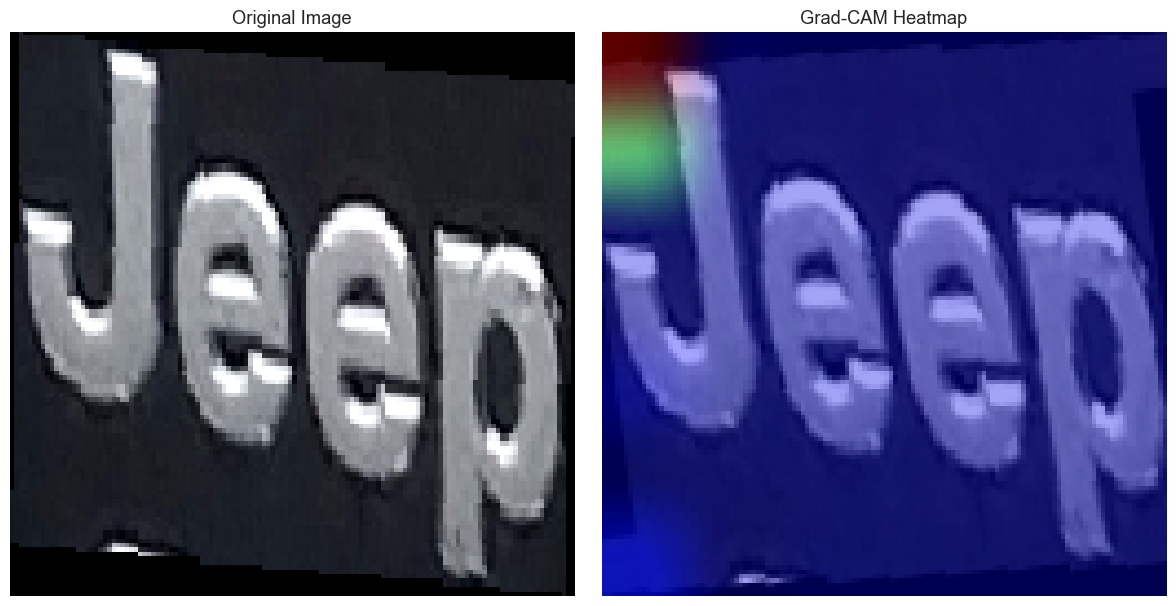

In [121]:
# 使用 flow() 方法获取处理后的图像数据
processed_img = next(gen.flow(img_array))

last_conv_layer_name1 = 'last_conv_model_1'

heatmaps1 = make_gradcam_heatmap(processed_img,model_1_test, last_conv_layer_name1)

plot_images(img,heatmaps1)


In [244]:
heatmaps = make_gradcam_heatmap(processed_img, ensemble_model, last_conv_layer_name)

# 将原始图像转换为可视化格式
original_img = tf.keras.utils.array_to_img(img_array[0])

# 展示原始图像和热图
plot_images(original_img, heatmaps)

In [46]:
import os
import numpy as np
from keras.applications import VGG16,ResNet50,InceptionV3
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.optimizers import Adam

In [47]:
# Load pre-trained VGG16 model (excluding top layers)
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(128, 128, 3))
# Add custom top layers for classification
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
output = Dense(32, activation='softmax')(x)
# Create the new model
model = Model(inputs=base_model.input, outputs=output)
# Freeze base layers to prevent their weights from being updated
for layer in base_model.layers:
    layer.trainable = False
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

In [48]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
# Train the model
history_pre = model.fit(train_generator, validation_data=validation_generator, epochs=10)


Epoch 1/10
700/700 [==============================] - 64s 86ms/step - loss: 3.3716 - accuracy: 0.0511 - val_loss: 2.8045 - val_accuracy: 0.1354
Epoch 2/10
700/700 [==============================] - 51s 73ms/step - loss: 3.0400 - accuracy: 0.1057 - val_loss: 2.2762 - val_accuracy: 0.2296
Epoch 3/10
700/700 [==============================] - 47s 67ms/step - loss: 2.7652 - accuracy: 0.1785 - val_loss: 1.9202 - val_accuracy: 0.2937
Epoch 4/10
700/700 [==============================] - 52s 74ms/step - loss: 2.6071 - accuracy: 0.2154 - val_loss: 1.8329 - val_accuracy: 0.3333
Epoch 5/10
700/700 [==============================] - 49s 70ms/step - loss: 2.5182 - accuracy: 0.2355 - val_loss: 1.6838 - val_accuracy: 0.3800
Epoch 6/10
700/700 [==============================] - 49s 70ms/step - loss: 2.4527 - accuracy: 0.2597 - val_loss: 1.5165 - val_accuracy: 0.3938
Epoch 7/10
700/700 [==============================] - 48s 69ms/step - loss: 2.4136 - accuracy: 0.2646 - val_loss: 1.4208 - val_accuracy:

In [91]:
from keras import backend as K
import gc

K.clear_session()
gc.collect()
del model
 
del ensemble_model

In [ ]:
#You need to install numba using 'pip install numba'

from numba import cuda

cuda.select_device(0)
cuda.close()